## ==========  LOGISTIC CLASSIFICATION: DATA SET 2  ==============

### Reading Input Dataset: 2D Attribytes & Class Labels

In [1]:
import csv
import os

In [2]:
x1_attributes = []
x2_attributes = []
labels = []
__location__ = os.path.realpath(os.path.join(os.getcwd(), "q4x.dat"))
print ("fetching data from location: " + __location__ + " . . .")
with open(__location__, 'r') as csvfile:   # Open the CSV file in read mode # Create a reader object
  csv_reader = csv.reader(csvfile)
  for row in csv_reader:  # Iterate through the rows in the CSV file
    row = row[0].split("  ")
    x1_attributes.append(float(row[0]))     # row is a list containing two element
    x2_attributes.append(float(row[1]))     # row is a list containing two element

__location__ = os.path.realpath(os.path.join(os.getcwd(), "q4y.dat"))
print ("fetching data from location: " + __location__ + " . . .")
with open(__location__, 'r') as csvfile:   # Open the CSV file in read mode # Create a reader object
  csv_reader = csv.reader(csvfile)
  for row in csv_reader:  # Iterate through the rows in the CSV file
    if row[0] == 'Alaska':
        labels.append(0)
    else:
        labels.append(1)

print ("number of data points: " + str(len(x1_attributes)))
if len(x1_attributes) != len(labels) or len(x2_attributes) != len(labels):
    print ("ERROR! Input number of attributed does not match the number of class labels!")
    exit(0)

fetching data from location: /Users/dishantgoyal/Desktop/ml/1_logistic_classification/q4x.dat . . .
fetching data from location: /Users/dishantgoyal/Desktop/ml/1_logistic_classification/q4y.dat . . .
number of data points: 100


### Plotting Dataset

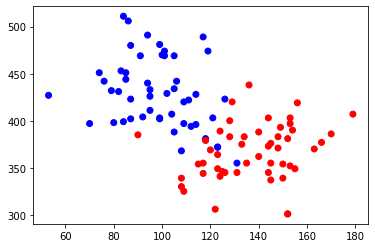

In [19]:
from matplotlib import pyplot as plt
color = []
for y in labels:
    if y == 1:
        color.append('red')
    else:
        color.append('blue')
plt.scatter(x1_attributes, x2_attributes, c=color)
plt.show()

### Plot Initial Hypthesis

##### starting point: line joining any two points, form: y = ax = b

initial slope: -0.5652173913043478, initial intercept: 429.04347826086956
passes through: (108.0, 368.0)  (131.0, 355.0)


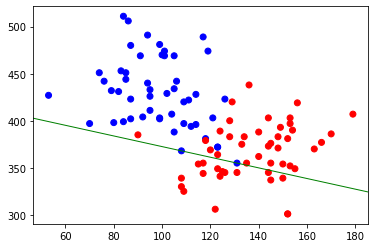

In [20]:
slope     = (x2_attributes[1] - x2_attributes[0])/(x1_attributes[1] - x1_attributes[0])
intercept =  x2_attributes[0] - x1_attributes[0]*slope
print("initial slope: " + str(slope) + ", initial intercept: " + str(intercept))
display_pt1 = "(" + str(x1_attributes[0]) + ", " + str(x2_attributes[0]) + ")"
display_pt2 = "(" + str(x1_attributes[1]) + ", " + str(x2_attributes[1]) + ")"
print("passes through: " + display_pt1 + "  " + display_pt2)
plt.scatter(x1_attributes, x2_attributes, c=color)
plt.axline((x1_attributes[1], x2_attributes[1]), slope=slope, linewidth=1, color='green') # or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
plt.show()


### Error Function

In [21]:
import math
e = math.e
def comp_error(a, b, error):
    for index in range(0, len(x1_attributes)):    # compute the full error
        x1              = x1_attributes[index]
        x2              = x2_attributes[index]
        scaled_distance = (x2 - a*x1 - b)/10                   # z = Theta_Transpose.x
        gz              = 1/(1+pow(e,-1*scaled_distance))      # lies between 0 and 1 
        
        if labels[index] == 0: probability = gz
        else:
            probability = 1 - gz
        if probability != 0: log_p = math.log(probability) 
        
        error[0]        += log_p
    error[0] = -1*error[0]                                     # - log likelyhood to make the error value positive

error = [0]
comp_error(slope, intercept, error)
print ("Initial Error: " + str(error[0]))

Initial Error: 124.47983449360474


### Gradient Computation

In [22]:
def comp_grad(a, b, grad_val):
    if num_iter % 1000 == 0:
        print ("computing gradient with all data points")
    for index in range(0, len(x1_attributes)):
        x1              = x1_attributes[index]
        x2              = x2_attributes[index]
        scaled_distance = (x2 - a*x1 - b)/10                   # z = Theta_Transpose.x
        gz              = 1/(1+pow(e,-1*scaled_distance))      # lies between 0 and 1 
        
        if labels[index] == 0:                  # gradient of log(1-gz) = -gz
            grad_val[0] += -1 * gz * x1/10            
            grad_val[1] += -1 * gz * 1/10
        else:                                   # gradient of log(gz)   = 1 - gz
            grad_val[0] += (1-gz) * x1/10
            grad_val[1] += (1-gz) * 1/10

num_iter = 0
grad_val = [0,0]
comp_grad(slope, intercept, grad_val)
print ("Initial Gradient: " + str(grad_val))

computing gradient with all data points
Initial Gradient: [-233.85454481161398, -2.934186920096855]


### Gradient Descent

In [28]:
learning_rate = 0.0001
old_error    = [99999999]
flag = 0
direction = 1
num_iter = 0

while (old_error[0] > 0.00001) and num_iter < 10000:
    error = [0]
    comp_error(slope, intercept, error)
    print ("error: " + str(error))

    grad_val  = [0,0]
    comp_grad (slope, intercept, grad_val)                              # computing gradient
    slope     = slope     - direction*learning_rate*grad_val[0];        # updating hypothesis
    intercept = intercept - direction*learning_rate*grad_val[1];        # updating hypothesis

    if flag == 0:                       # change direction if the error is not decreased after the first step
        new_error = [0]
        comp_error(slope, intercept, new_error)
        if new_error[0] > error[0]:
            print ("changing the direction of movement! restoring previous hypothesis . . .") 
            slope     += direction*learning_rate*grad_val[0];
            intercept += direction*learning_rate*grad_val[1];
            direction = -1
            continue
        else:
            print ("moving in the right direction... all good!") 
            flag = 1
        

    if error[0] > old_error[0]:
        slope     += direction*learning_rate*grad_val[0];
        intercept += direction*learning_rate*grad_val[1];
        print ("EXITING... Reached End! Error will increase from now on!")
        break
    old_error[0]   =  error[0]
    num_iter +=1;

error: [66.07552064438924]
computing gradient with all data points
moving in the right direction... all good!
error: [66.06103325676209]
error: [66.04858862183372]
error: [66.03789902918581]
error: [66.02871745627142]
error: [66.02083177153791]
error: [66.01405977446632]
error: [66.00824494888626]
error: [66.00325282489509]
error: [65.9989678606029]
error: [65.99529076826792]
error: [65.99213622063158]
error: [65.9894308827524]
error: [65.98711172267384]
error: [65.9851245610687]
error: [65.9834228257973]
error: [65.98196648223242]
error: [65.9807211144024]
error: [65.97965713558406]
error: [65.97874911002748]
error: [65.97797517011152]
error: [65.97731651545897]
error: [65.97675698245565]
error: [65.9762826742532]
error: [65.97588164273972]
error: [65.9755436151677]
error: [65.97525975915708]
error: [65.97502248068186]
error: [65.97482525040209]
error: [65.97466245436446]
error: [65.97452926564516]
error: [65.974421533998]
error: [65.97433569098004]
error: [65.97426866838154]
error: [

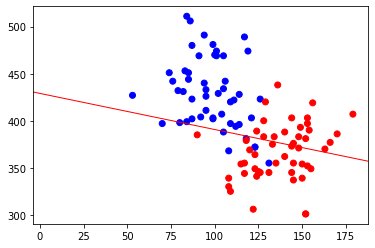

In [26]:
plt.scatter(x1_attributes, x2_attributes, c=color)
plt.axline((5, 5*slope + intercept), slope=slope, linewidth=1, color='r')# or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
plt.show()